In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Circle, Rectangle, Arc

In [73]:
data = pd.read_csv("NBA_2004_Shots.csv")

In [80]:
famous_players = [
    "Kobe Bryant", "Shaquille O'Neal", "LeBron James", "Allen Iverson", 
    "Kevin Garnett", "Tim Duncan", "Dirk Nowitzki", "Vince Carter", 
    "Ray Allen", "Tracy McGrady", "Carmelo Anthony", "Pau Gasol", 
    "Jason Kidd", "Steve Nash", "Karl Malone"
]

In [81]:
famous_data = data[data['PLAYER_NAME'].isin(famous_players)]

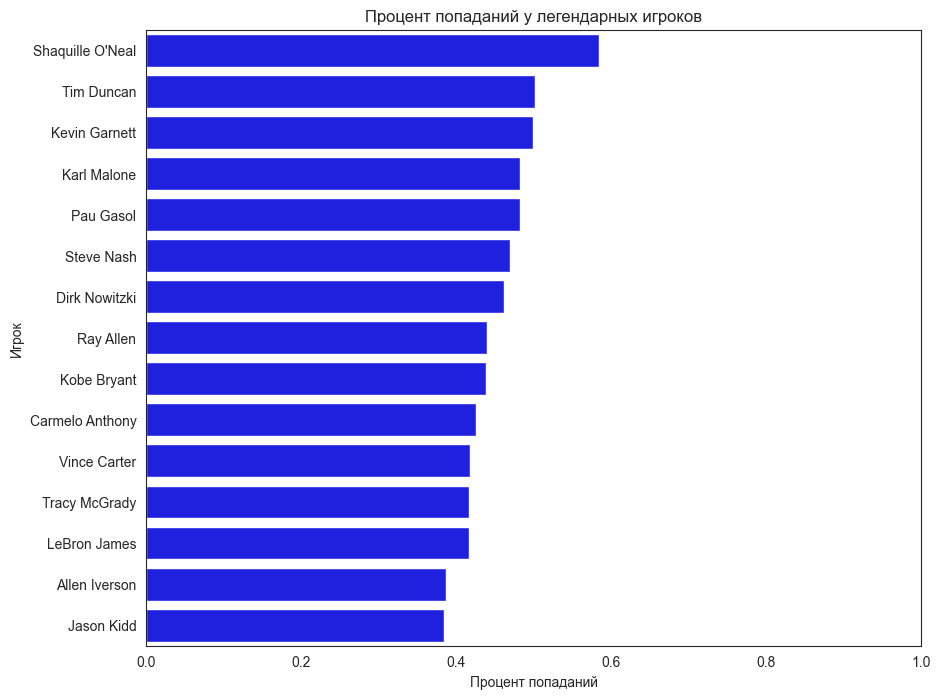

In [88]:
summary_accuracy = famous_data.groupby('PLAYER_NAME')['SHOT_MADE'] \
    .mean() \
    .reset_index() \
    .sort_values('SHOT_MADE', ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(data=summary_accuracy, x='SHOT_MADE', y='PLAYER_NAME', color='blue')
plt.title("Процент попаданий у легендарных игроков")
plt.xlabel("Процент попаданий")
plt.ylabel("Игрок")
plt.xlim(0, 1)
plt.show()

In [101]:
selected_players = ["Kobe Bryant", "Shaquille O'Neal", "LeBron James", "Vince Carter"]

In [ ]:
def draw_court(ax=None, color='black', lw=1, outer_lines=False):
    if ax is None:
        ax = plt.gca()
    hoop = Circle((0, 0), radius=0.75, linewidth=lw, color=color, fill=False)
    backboard = Rectangle((-3, -1), 6, 0.1, linewidth=lw, color=color)
    three_point_arc = Arc((0,0), 44.0, 44.0, theta1=0, theta2=180, linewidth=lw, color=color)
    free_throw_lane = Rectangle((-8,0), 16, 19, fill=False, linewidth=lw, color=color)
    free_throw_arc = Arc((0,19), 12, 12, theta1=180, theta2=0, linewidth=lw, color=color, fill=False)
    ax.add_patch(hoop)
    ax.add_patch(backboard)
    ax.add_patch(free_throw_lane)
    ax.add_patch(free_throw_arc)
    ax.add_patch(three_point_arc)
    ax.plot([-8,-8],[0,19], linewidth=lw, color=color)
    ax.plot([8,8],[0,19], linewidth=lw, color=color)
    if outer_lines:
        outer_boundary = Rectangle((-25, 0), 50, 47, fill=False, linewidth=lw, color=color)
        ax.add_patch(outer_boundary)
    ax.set_xlim(-25, 25)
    ax.set_ylim(0, 47)
    ax.set_aspect(1)
    ax.axis('off')
    return ax

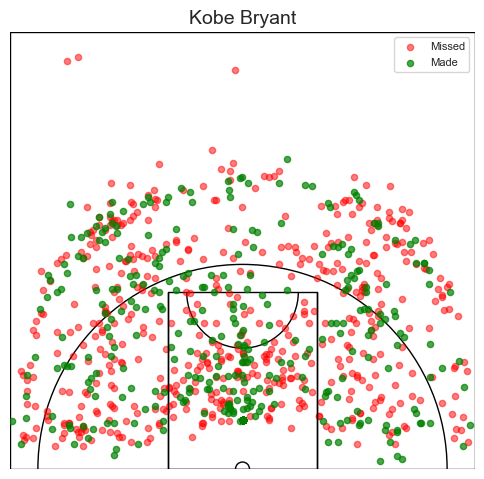

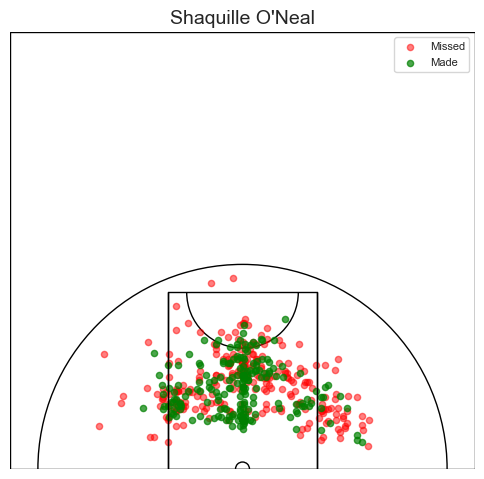

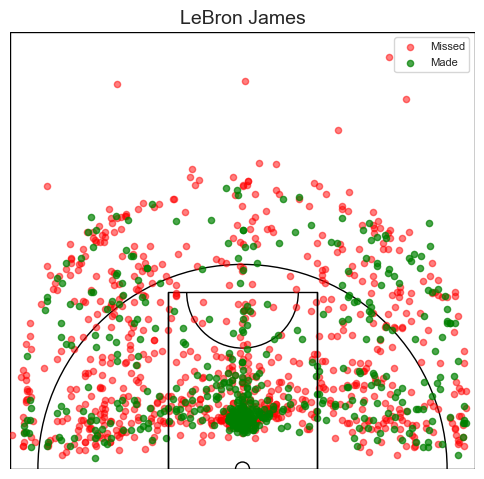

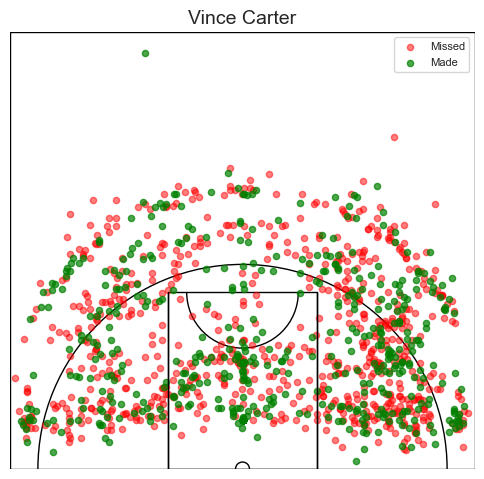

In [103]:
for player in selected_players:
    player_data = data[data['PLAYER_NAME'] == player]
    
    fig, ax = plt.subplots(figsize=(6,6))
    draw_court(ax, outer_lines=True)
    ax.set_title(player, fontsize=14)
    
    made = player_data[player_data['SHOT_MADE'] == True]
    missed = player_data[player_data['SHOT_MADE'] == False]
    
    ax.scatter(missed['LOC_X'], missed['LOC_Y'], c='red', alpha=0.5, s=20, label='Missed')
    ax.scatter(made['LOC_X'], made['LOC_Y'], c='green', alpha=0.7, s=20, label='Made')
    ax.legend(loc='upper right', fontsize=8)

    plt.show()